<h1><b> Import library and dataset

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
df = pd.read_csv("winequality.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  good color  
0      9.4        5     0   red  
1      9.8        5     0   red  
2      9.8        5     0   red  
3      9.8        6     0   red  
4      9.4        5     0   red

In [16]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality         good  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.196552  
std       0.160787     0.148806     1.192712     0.873255     0.397421  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

<h1><b> Data Exploration

first i want to see unique value in categorical column <b>`["quality", "good", "color"]`</b> before performing data encoding to this categorical column

In [17]:
for column in df[["quality", "good", "color"]]:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

df["color"] = df['color'].replace({'red': 1, 'white': 0})

Unique values in quality:
[5 6 7 4 8 3 9]

Unique values in good:
[0 1]

Unique values in color:
['red' 'white']



then i will see data distribution based on wine color

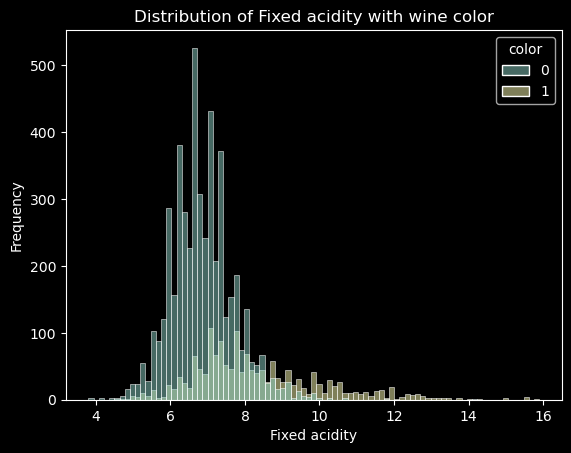

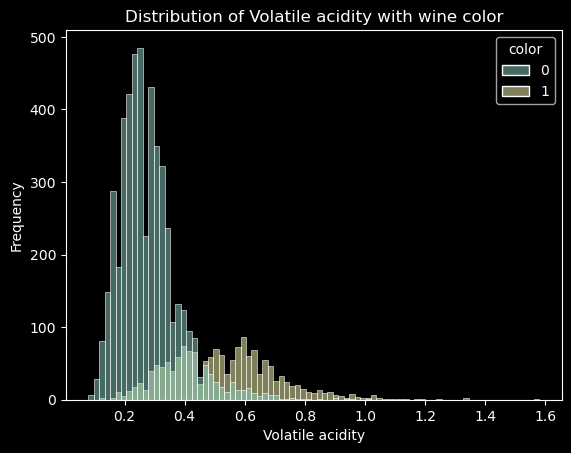

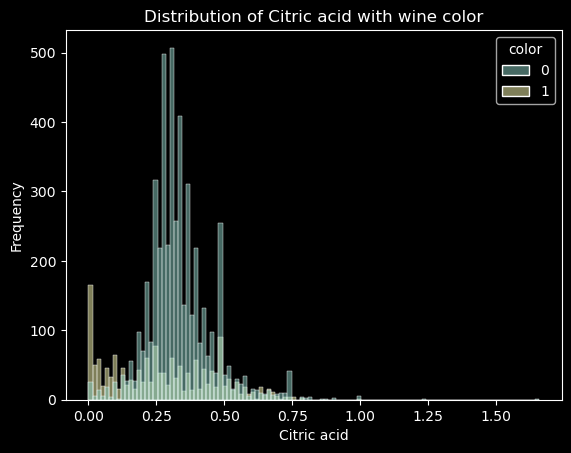

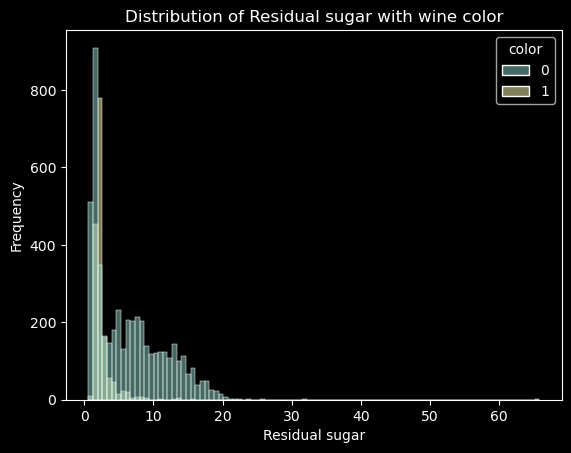

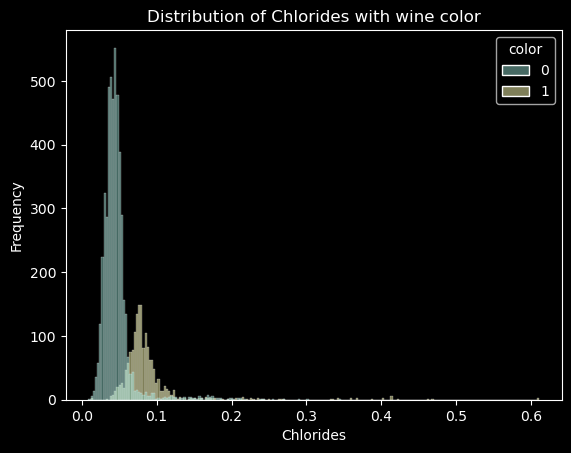

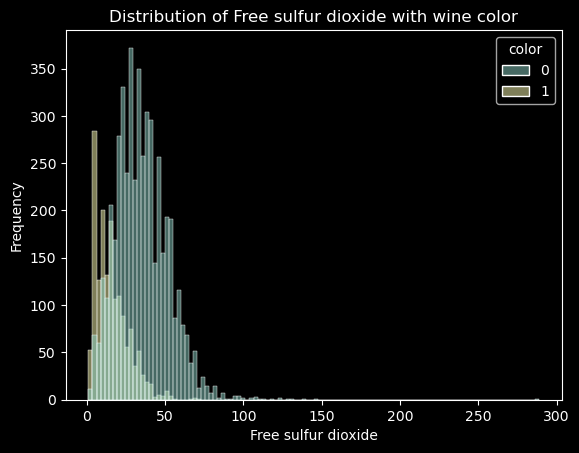

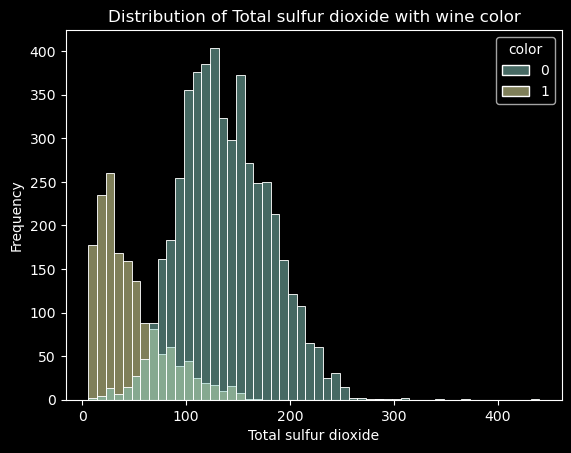

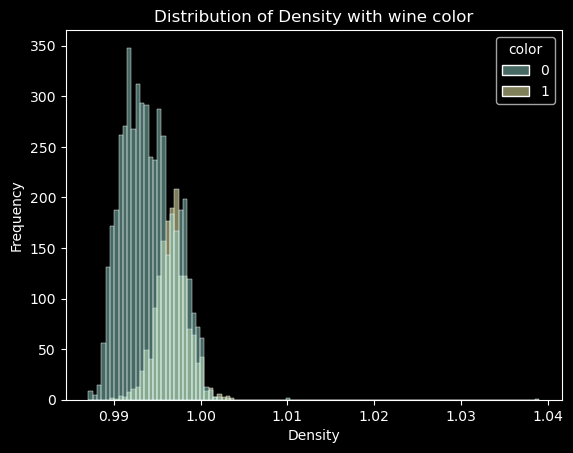

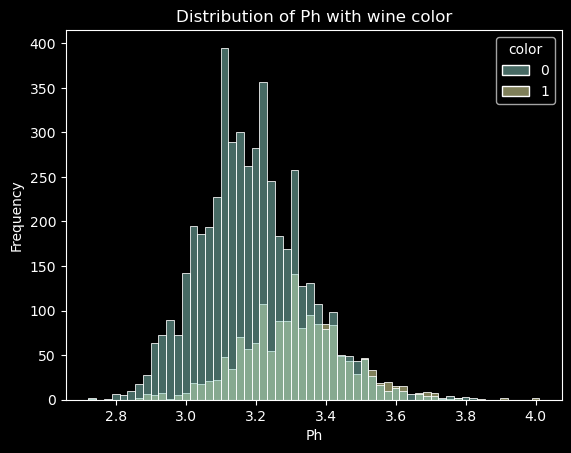

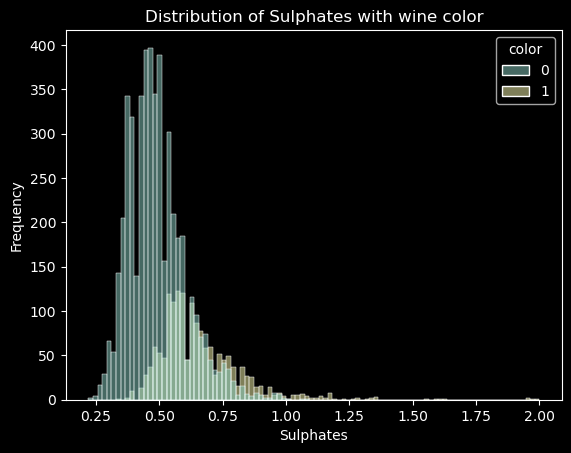

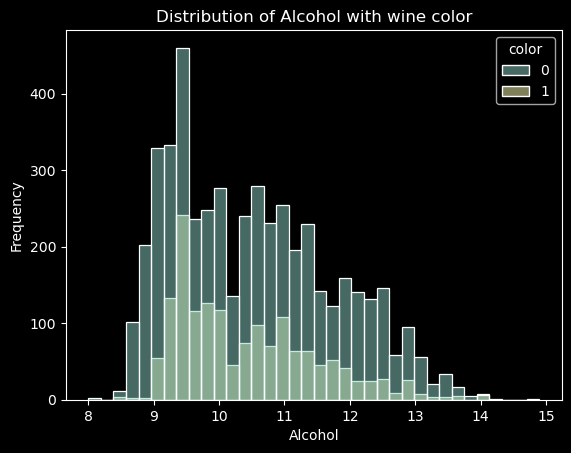

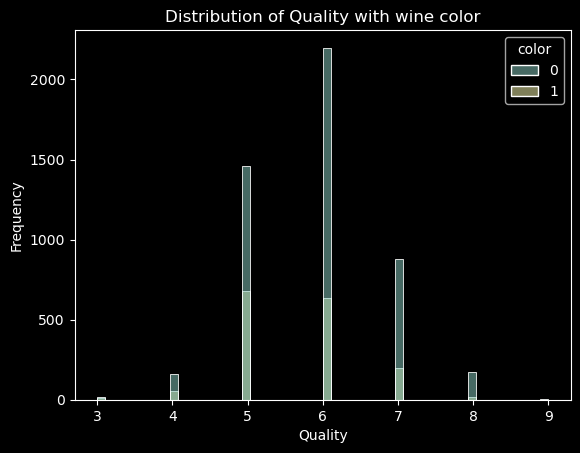

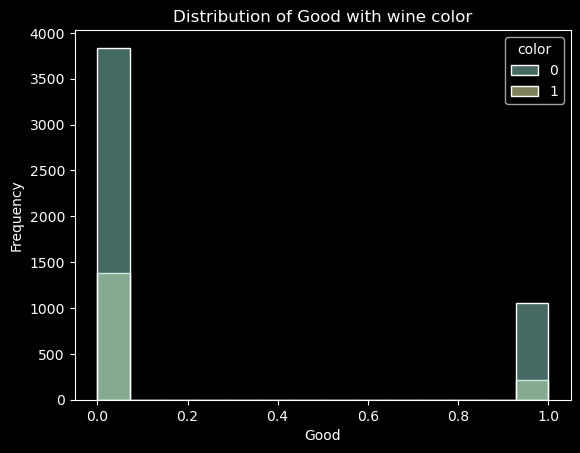

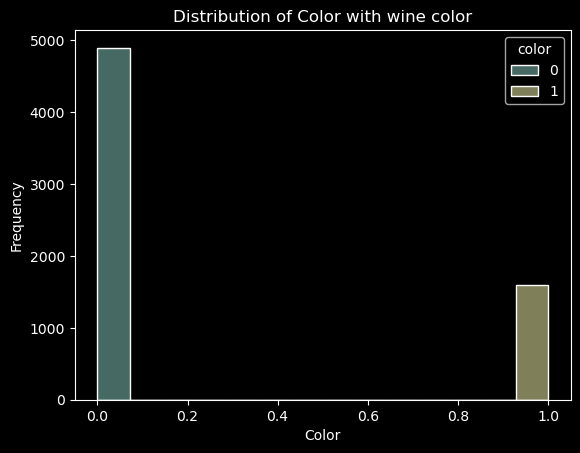

In [18]:
for column in df.columns:
    sns.histplot(data=df, x=column, hue="color")
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column.capitalize()} with wine color')
    plt.show()

<h1><b> Features Engineering

i will perform <b>Variance-Threshold</b> method, this will drop low-variance column so doesnt become bias while clustering data

In [19]:
threshold = .001
selector = VarianceThreshold(threshold)

selector.fit(df)

feature_indices = selector.get_support()

df = df.iloc[:, feature_indices]

there is 1 column that has variance score below 0.001 <b>`[density]`</b>, i done to remove that column and i will see remaining column variance score

In [20]:
variance_scores = selector.variances_

for column, score in zip(df.columns, variance_scores):
    print(f"Variance score for {column}: {score}")

Variance score for fixed acidity: 1.6804817935055756
Variance score for volatile acidity: 0.02710099664758073
Variance score for citric acid: 0.021114031545656727
Variance score for residual sugar: 22.633212281540104
Variance score for chlorides: 0.0012271643143616866
Variance score for free sulfur dioxide: 314.99270201051104
Variance score for total sulfur dioxide: 3194.228316338044
Variance score for pH: 8.990655753714628e-06
Variance score for sulphates: 0.02584854521245867
Variance score for alcohol: 0.022139779804837167
Variance score for quality: 1.4223423592509294
Variance score for good: 0.7624573958893047
Variance score for color: 0.15791946598575743


then i will perform any features selection again there is <b>pearso-correlation</b> method, this will drop features that have high correlation with other features column so doesnt become bias while clustering data

<Axes: >

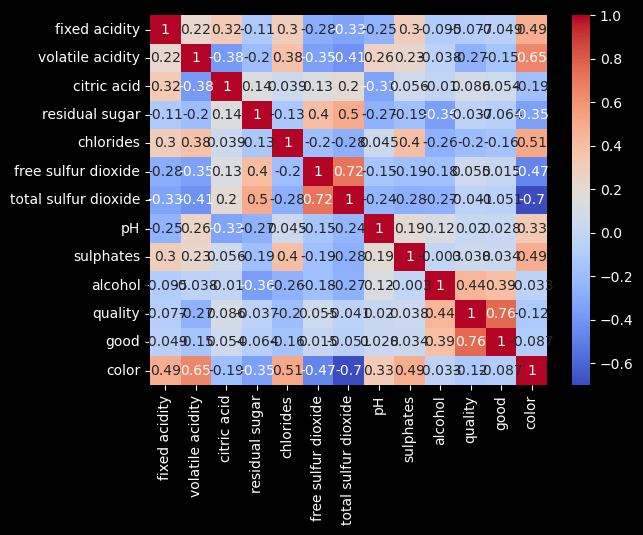

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [22]:
threshold = 0.7
highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.append(colname)

i detect there are 3 features column with high correlation *more than 0.7 (threshold value)*, i will also drop these 3 column from dataframe

In [23]:
df.drop(highly_correlated, axis=1, inplace=True)

<Axes: >

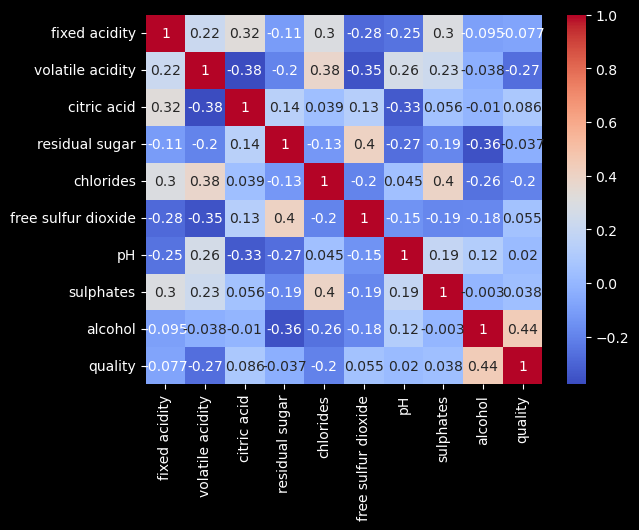

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<h1><b> Clustering

first i will search best number of cluster using <b>Elbow Methon</b>, sum of squared distance of samples to their closest cluster center

c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

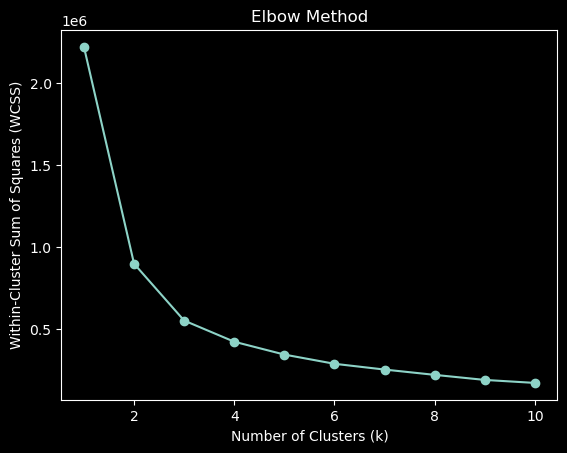

In [25]:
k_values = range(1, 11) 

wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

also i will searching with silhoutte score 

c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

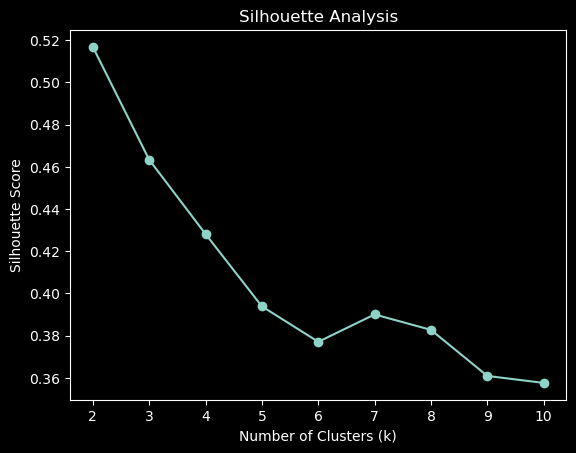

In [27]:
silhouette_scores = []

k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(df)
    labels = km.labels_
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

from 2 method for seacrhing best cluster number, we get <b>two cluster</b> as best cluster number for this dataframe

In [29]:
cluster = KMeans(n_clusters = 2 ,max_iter=1000, tol=.000001,  random_state= 64, algorithm="full")
cluster.fit(df)

c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', max_iter=1000, n_clusters=2, random_state=64,
       tol=1e-06)

i will see data distribution for each cluster

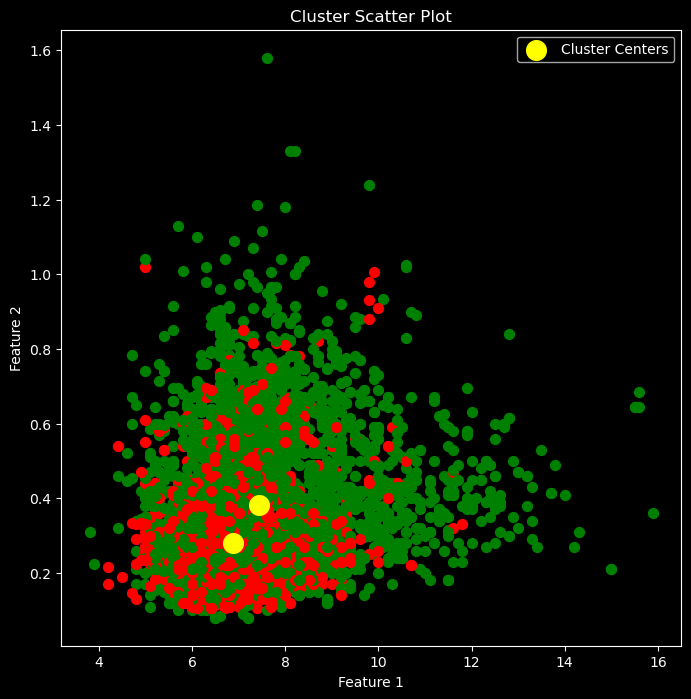

In [43]:
X = df.iloc[: , :].values

labels = cluster.labels_
cluster_centers = cluster.cluster_centers_

plt.figure(figsize=(8, 8))
colors = ['r', 'g']

for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]], s=50)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='yellow', marker='o', s=200, label='Cluster Centers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Scatter Plot')
plt.legend()
plt.show()


seeing wcss and silhoutte score from cluster

In [44]:
distances = [np.linalg.norm(X[i] - cluster_centers[labels[i]]) for i in range(len(X))]
wcss = np.sum(np.square(distances))

print("WCSS:", wcss)

WCSS: 898072.0485962235


In [45]:
silhouette_coefficient = silhouette_score(X, labels)

print("Silhouette Coefficient:", silhouette_coefficient)

Silhouette Coefficient: 0.5168477424389168


labeling cluster and see cluster distribution with each features in dataframe

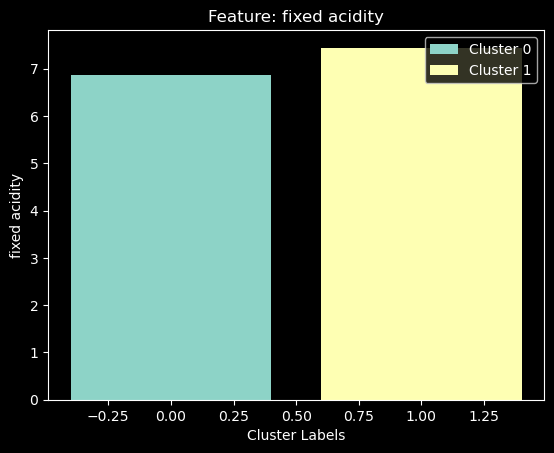

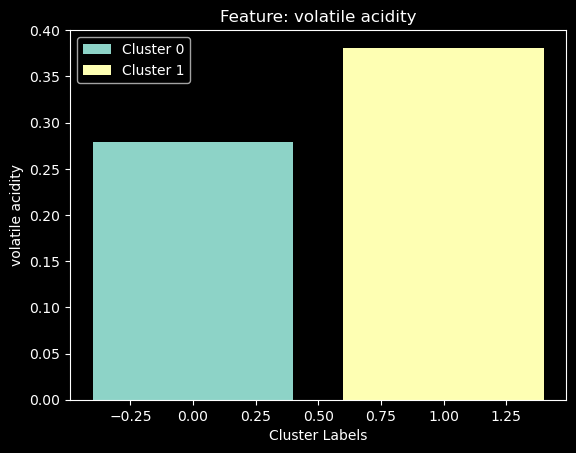

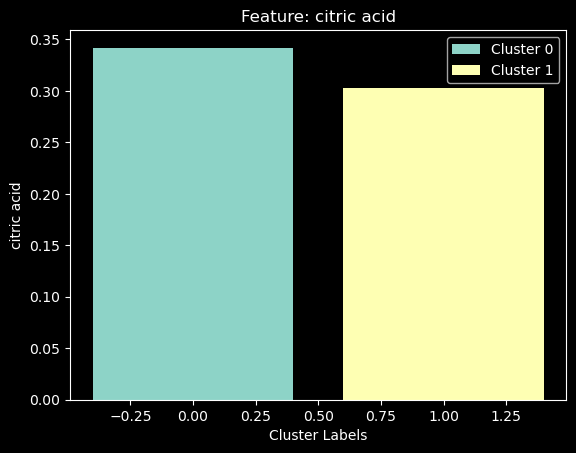

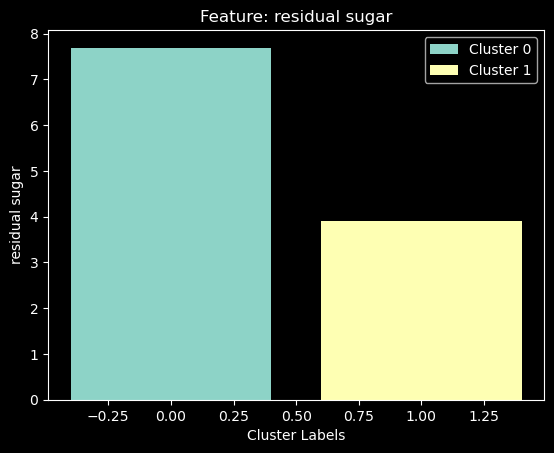

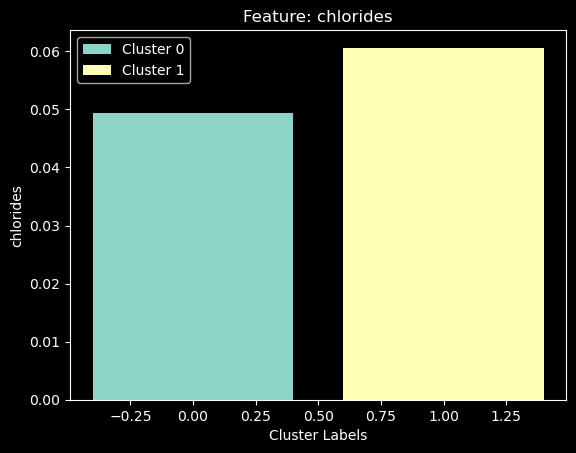

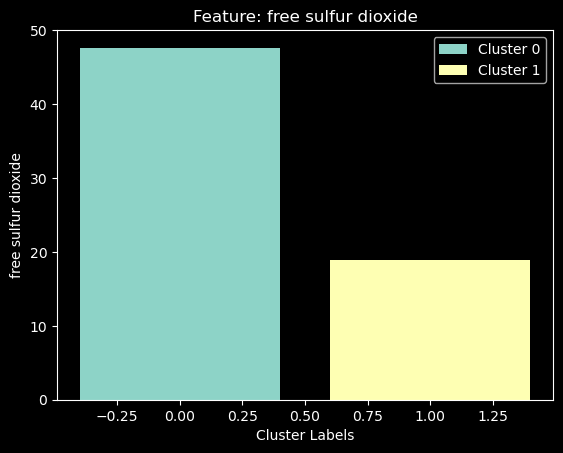

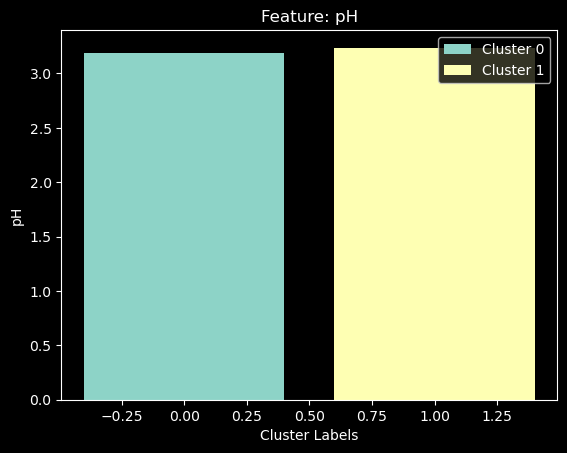

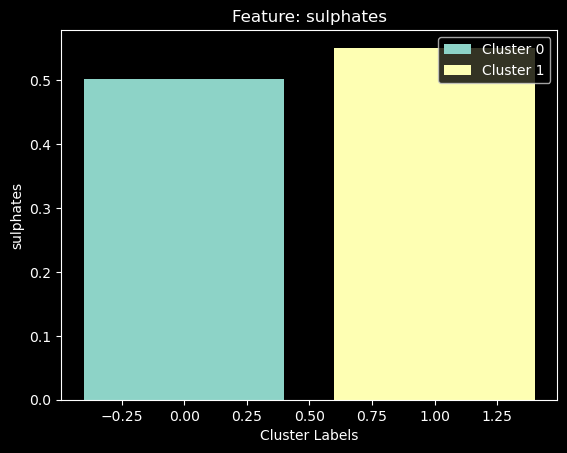

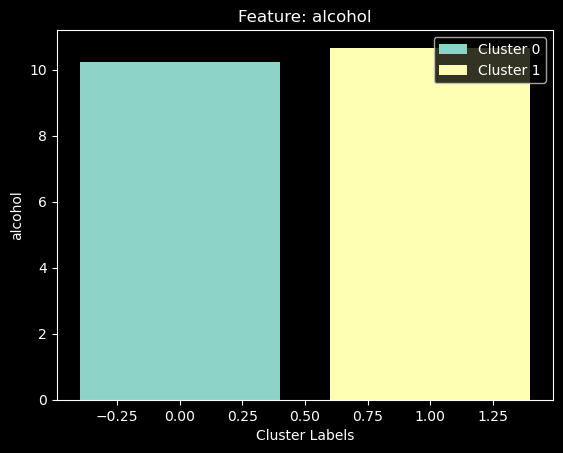

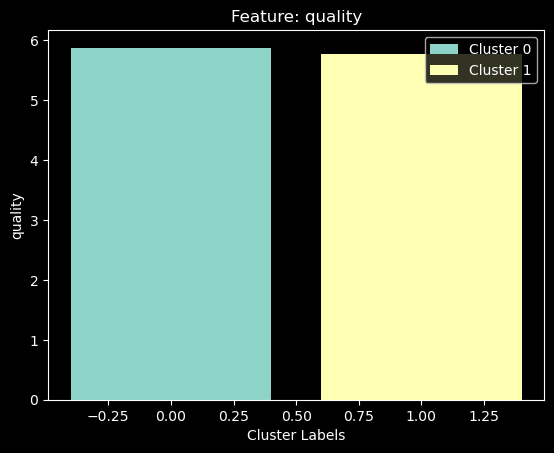

In [61]:
df['cluster_labels'] = labels

cluster_profiles = df.groupby('cluster_labels').mean()

for feature in cluster_profiles.columns:
    plt.figure()
    for cluster_label, profile in cluster_profiles.iterrows():
        plt.bar(cluster_label, profile[feature], label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster Labels')
    plt.ylabel(feature)
    plt.title(f'Feature: {feature}')
    plt.legend()
    plt.show()

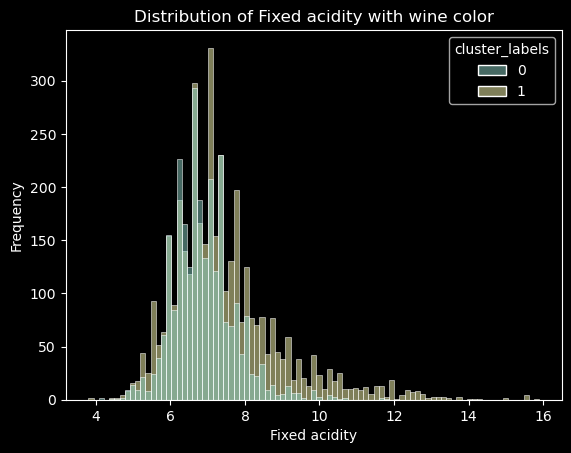

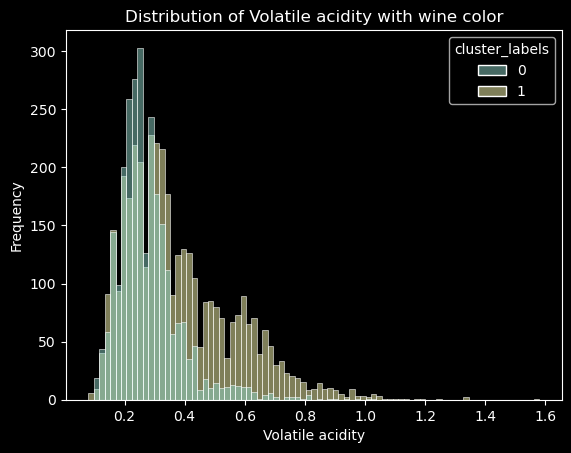

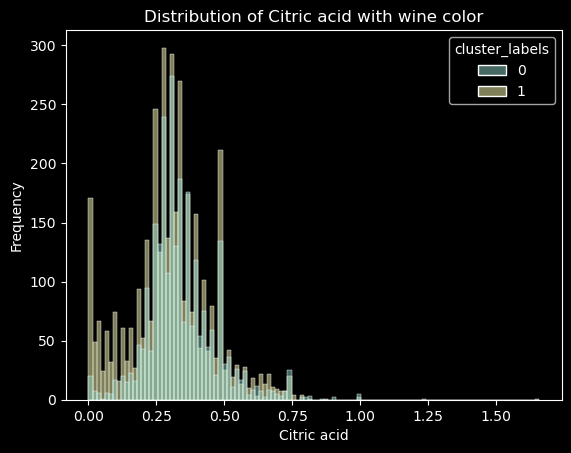

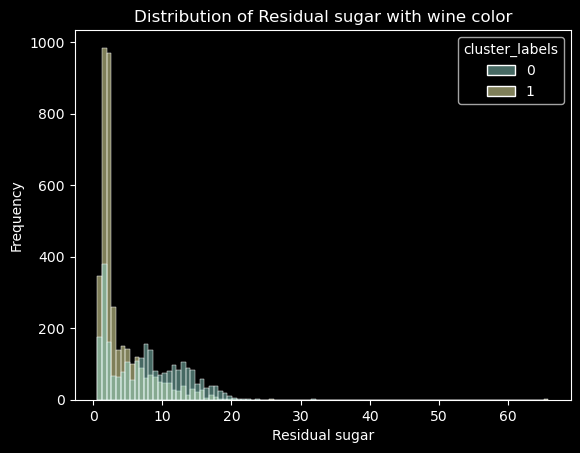

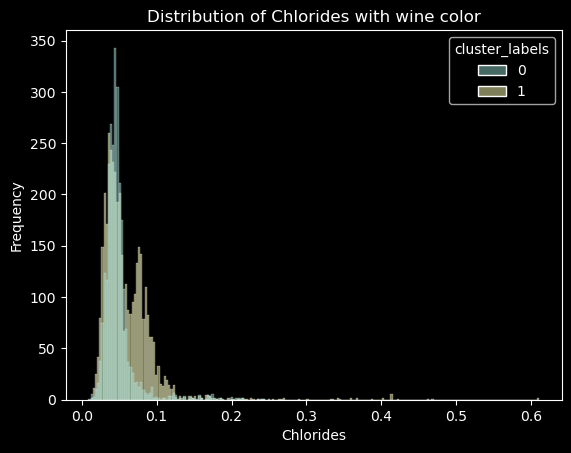

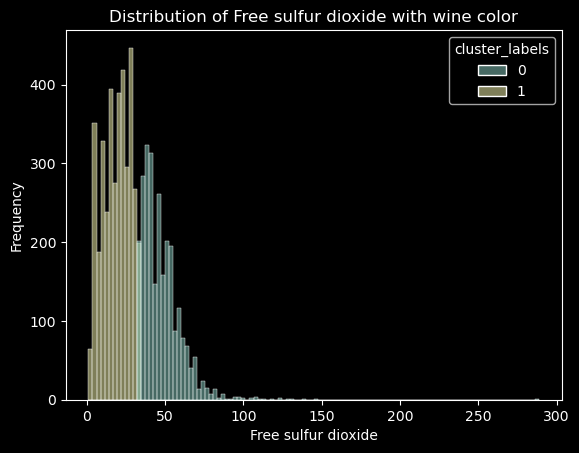

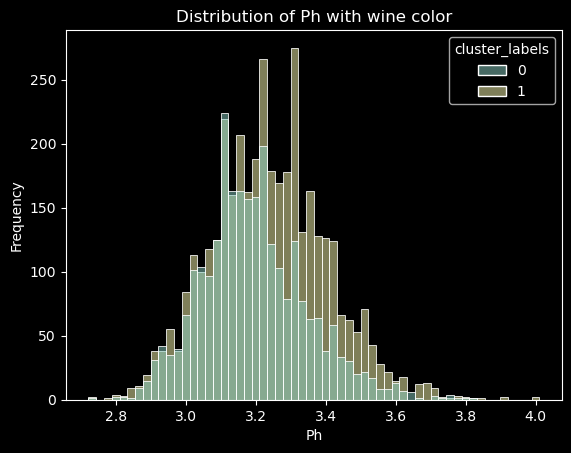

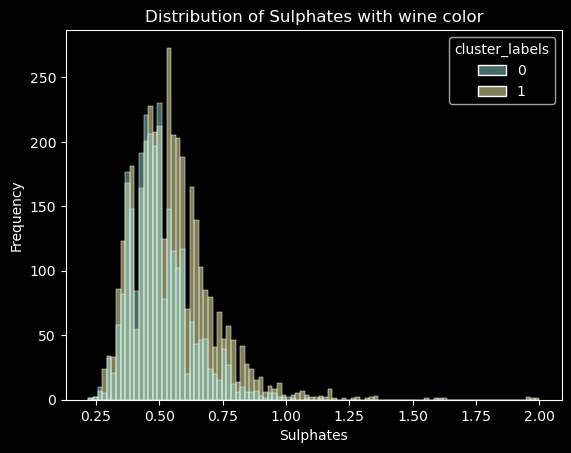

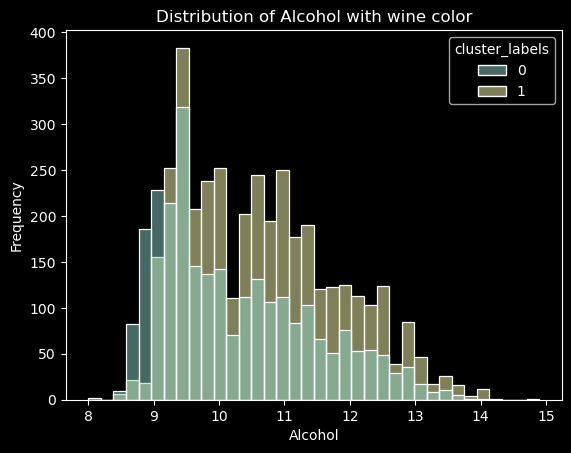

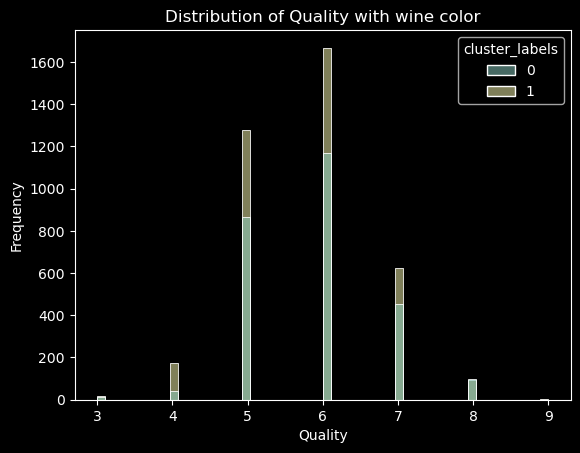

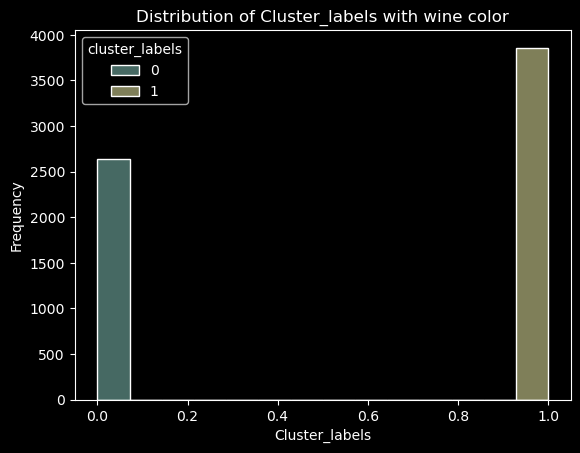

In [58]:
for column in df.columns:
    sns.histplot(data=df, x=column, hue="cluster_labels")
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column.capitalize()} with cluster')
    plt.show()